<a href="https://colab.research.google.com/github/booorayan/fin_wk_2_proj/blob/master/fin_inclusion_dsproject_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting If Individuals Are Likely To Have A Bank Account Or Not Using A ML Model 

## Defining the Question

### Research Problem

Determine whether an individual is likely to have a bank account or not in order to gauge state of financial inclusion in a given region.

### Context

By predicting individuals likely to have a bank account, we will be able to determine persons with access to financial services in East Africa and consequently, gauge the state of financial inclusion in this region. 

### Metrics for Success



1.   A machine learning model that predicts with an accuracy > 85%
2.   



### Experimental Design

This project followed the CRISP-DM methodology. the CRISP-DM methodology entails the following steps:


1.   Problem Understanding
2.   Data Understanding
3.   Data Preparation 
4.   Modelling
5.   Evaluation



### Appropriateness of Dataset

The dataset provided contains relevant features/variables such as type of job, level of education, has a bank account, type of location etc., all of which can be used as either features or labels to develop a ML model that predicts whether a person has a bank account or not.

## Importing libraries to be used

In [0]:
# pandas allows us to organize data in table form
import pandas as pd

# nummpy will enable us to work with multidimensional arrays
import numpy as np

# matplotlib will help in visualizing the data
import matplotlib.pyplot as plt
%matplotlib inline  

# seaborn will also help in data visualization
import seaborn as sns
sns.set()  #(Re)set the seaborn default

# pandas profiling provides a summary report, including descriptive statistics of the dataset 
import pandas_profiling as pp

# label encoder converts labels/categorical variables to numerical values

from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression


from sklearn.metrics import r2_score

import statsmodels.api as sm

# train_test_split from sklearn enables us to split our dataframe into training and test sets
from sklearn.model_selection import train_test_split

# sklearn's standardscaler enables one to normalize features in a dataframe to be trained 
from sklearn.preprocessing import StandardScaler

# pca is one of the existing approaches for dimensionality reduction
from sklearn.decomposition import PCA

# randomforest classifier is ML model that predicts by classifying data into leaf nodes
from sklearn.ensemble import RandomForestClassifier

# LDA is another approach for dimensionality reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# confusion_matrix and accuracy_score help in evaluating the performance of model created
from sklearn.metrics import confusion_matrix, accuracy_score

## Loading and previewing the dataset

In [431]:
# loading the dataset and previewing the first 5 observations
url = 'http://bit.ly/FinancialDataset'

finance = pd.read_csv(url)
finance.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [432]:
# checking the size of the dataset
finance.shape

# output indicates that dataframe has 23,524 rows and 13 columns

(23524, 13)

In [433]:
# previewing the columns in the dataset

finance.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [434]:
# checking the datatypes of the columns in the dataframe

finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23510 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
Has a Bank account        23488 non-null object
Type of Location          23509 non-null object
Cell Phone Access         23513 non-null object
household_size            23496 non-null float64
Respondent Age            23490 non-null float64
gender_of_respondent      23490 non-null object
The relathip with head    23520 non-null object
marital_status            23492 non-null object
Level of Educuation       23495 non-null object
Type of Job               23494 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


## Tidying the Dataset/Data Cleaning

In [435]:
# creating a copy of the dataset named fin to work on using copy() and maintaining the original copy 

fin = finance.copy()
fin.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [436]:
# replacing whitespaces in column names with underscores and converting all column names to lowercase to ensure uniformity

fin.columns = fin.columns.str.replace(' ', '_').str.lower()
fin.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

In [437]:
# renaming some column names to make them shorter and more descriptive 

fin.rename(columns={'the_relathip_with_head': 'rltshp_with_head', 'type_of_job':'job_type', 'level_of_educuation': 'education_level', 'has_a_bank_account':'has_bank_account', 'type_of_location':'location', 'cell_phone_access': 'cellphone_access'}, inplace=True)
fin.columns

Index(['country', 'year', 'uniqueid', 'has_bank_account', 'location',
       'cellphone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'rltshp_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [438]:
# checking for the sum of duplicate values in the dataset

fin.duplicated().sum()

# output indicates we don't have duplicate values in the dataset


0

In [439]:
# checking for the sum of missing values in each column
fin.isnull().sum()

country                 14
year                     0
uniqueid                 0
has_bank_account        36
location                15
cellphone_access        11
household_size          28
respondent_age          34
gender_of_respondent    34
rltshp_with_head         4
marital_status          32
education_level         29
job_type                30
dtype: int64

In [440]:
# checking total sum of missing values
fin.isnull().sum().sum()

# dataset has a total of 267 missing values

267

In [441]:
# checking the percentage of missing values in dataset

tot_obs = len(fin.index) * len(fin.columns)

pcnt_missing_values = (fin.isnull().sum().sum()/tot_obs) * 100

pcnt_missing_values

# missing values account for a negligible percent (approx 0.09%) of the total observations in the dataset

0.08730854250323727

In [442]:
# Dropping missing values from dataframe (because % of missing values < 5%) using the dropna() method
# and confirming if the missing values have been dropped
fin.dropna(inplace=True)
fin.isnull().sum()

# columns no longer have missing values

country                 0
year                    0
uniqueid                0
has_bank_account        0
location                0
cellphone_access        0
household_size          0
respondent_age          0
gender_of_respondent    0
rltshp_with_head        0
marital_status          0
education_level         0
job_type                0
dtype: int64

In [443]:
# checking the number of observations in each column after dropping null values
fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23343 entries, 0 to 23523
Data columns (total 13 columns):
country                 23343 non-null object
year                    23343 non-null int64
uniqueid                23343 non-null object
has_bank_account        23343 non-null object
location                23343 non-null object
cellphone_access        23343 non-null object
household_size          23343 non-null float64
respondent_age          23343 non-null float64
gender_of_respondent    23343 non-null object
rltshp_with_head        23343 non-null object
marital_status          23343 non-null object
education_level         23343 non-null object
job_type                23343 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 2.5+ MB


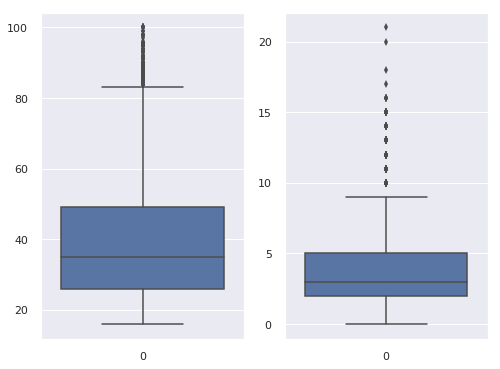

In [444]:
# using a boxplot to check for outliers in the numerical variables in the dataset

finfig, axx = plt.subplots(1,2, figsize=(8,6))
sns.boxplot(data=fin['respondent_age'], ax=axx[0])
sns.boxplot(data=fin['household_size'], ax=axx[1])
plt.show()


In [0]:
# even though the outliers are reasonable, we will remove them using IQR approach so that columns can have a normal distribution

Q1 = fin['household_size'].quantile(0.25)
Q3 = fin['household_size'].quantile(0.75)

IQR = Q3 - Q1

fin_t = fin[~((fin['household_size'] < Q1 - 1.5 * IQR) | (fin['household_size'] > Q3 + 1.5 * IQR))]


In [0]:
Q1 = fin_t['respondent_age'].quantile(0.25)
Q3 = fin_t['respondent_age'].quantile(0.75)

IQR = Q3 - Q1

fin_t = fin_t[~((fin_t['respondent_age'] < Q1 - 1.5 * IQR) | (fin_t['respondent_age'] > Q3 + 1.5 * IQR))]


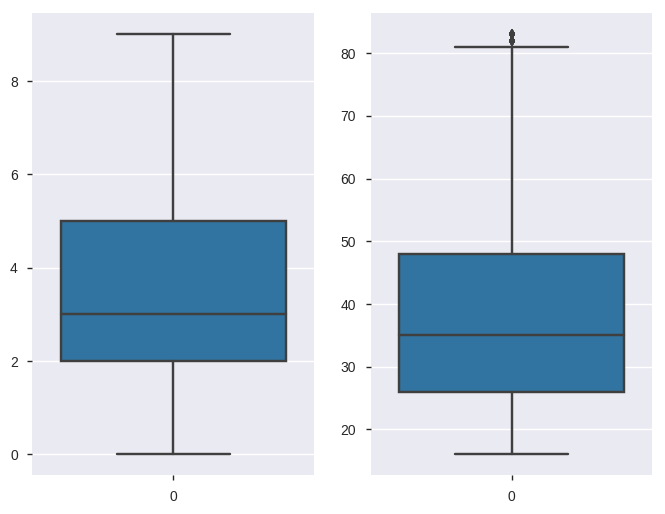

In [523]:
fig, axxx = plt.subplots(1,2, figsize=(8,6))

sns.boxplot(data=fin_t['household_size'], ax=axxx[0])
sns.boxplot(data=fin_t['respondent_age'], ax=axxx[1])
plt.show()


In [524]:
# using pandas profiling to get a summarized report of the dataset

pp.ProfileReport(fin_t)

Number of variables,14
Number of observations,22728
Total Missing (%),0.0%
Total size in memory,2.4 MiB
Average record size in memory,112.0 B
Numeric,4
Categorical,10
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [525]:
# pandas profiling report revealed anomalies in the year column(i.e. 2029, 2039 and 2056)
# confirming the presence of these anomalies and their counts using value_counts()


fin_t['year'].value_counts()


2016    8512
2018    7789
2017    6424
2029       1
2056       1
2039       1
Name: year, dtype: int64

In [0]:
# removing the anomalies from the year column as they feature only 3 times

anomalies_index = fin_t[(fin_t['year'] > 2018)].index
fin_t.drop(anomalies_index, inplace=True)

In [527]:
# confirming if the the anomalies have been dropped

print(fin_t.year.unique())

[2018 2016 2017]


In [528]:
# checking the number of observations in each column after dropping the anomalies in the year column
fin_t.info()

# resulting dataset now has 22,652 rows and 13 columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22725 entries, 0 to 23522
Data columns (total 13 columns):
country                 22725 non-null object
year                    22725 non-null int64
uniqueid                22725 non-null object
has_bank_account        22725 non-null object
location                22725 non-null object
cellphone_access        22725 non-null object
household_size          22725 non-null float64
respondent_age          22725 non-null float64
gender_of_respondent    22725 non-null object
rltshp_with_head        22725 non-null object
marital_status          22725 non-null object
education_level         22725 non-null object
job_type                22725 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 2.4+ MB


In [529]:
# dropping columns uniqueid and year because they are not useful for this analysis

fin_t.drop(columns=['year', 'uniqueid'], inplace=True)
fin_t.columns

Index(['country', 'has_bank_account', 'location', 'cellphone_access',
       'household_size', 'respondent_age', 'gender_of_respondent',
       'rltshp_with_head', 'marital_status', 'education_level', 'job_type'],
      dtype='object')

In [530]:
fin_t.info()

# dataframe fin_t (with outliers removed) has 22,652 rows and 11 columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22725 entries, 0 to 23522
Data columns (total 11 columns):
country                 22725 non-null object
has_bank_account        22725 non-null object
location                22725 non-null object
cellphone_access        22725 non-null object
household_size          22725 non-null float64
respondent_age          22725 non-null float64
gender_of_respondent    22725 non-null object
rltshp_with_head        22725 non-null object
marital_status          22725 non-null object
education_level         22725 non-null object
job_type                22725 non-null object
dtypes: float64(2), object(9)
memory usage: 2.1+ MB


In [531]:
fin_t.duplicated().sum()

4354

In [0]:
fin_t.drop_duplicates(inplace=True)

In [533]:
fin_t.duplicated().sum()

0

In [534]:
fin_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18371 entries, 0 to 23522
Data columns (total 11 columns):
country                 18371 non-null object
has_bank_account        18371 non-null object
location                18371 non-null object
cellphone_access        18371 non-null object
household_size          18371 non-null float64
respondent_age          18371 non-null float64
gender_of_respondent    18371 non-null object
rltshp_with_head        18371 non-null object
marital_status          18371 non-null object
education_level         18371 non-null object
job_type                18371 non-null object
dtypes: float64(2), object(9)
memory usage: 1.7+ MB


## Univariate and Bivariate Analysis

### Frequency Tables

In [535]:
# frequency table for the has_bank_account column

fin_t['has_bank_account'].value_counts()



No     15301
Yes     3070
Name: has_bank_account, dtype: int64

In [536]:
# frequency table for country column
fin_t['country'].value_counts()

Rwanda      6482
Kenya       5423
Tanzania    4670
Uganda      1796
Name: country, dtype: int64

In [537]:
# frequency table for cellphone_access column
fin_t['cellphone_access'].value_counts()

Yes    13674
No      4697
Name: cellphone_access, dtype: int64

### Univariate Analysis

#### Measures of Central Tendency

In [538]:
# mean, mode and median of respondent_age and household size columns

mean_age = fin_t['respondent_age'].mean()
print('mean age: %.2f' % mean_age)

mean_hsehld_size = fin_t['household_size'].mean()
print('mean household size: %.2f' % mean_hsehld_size)

mode_age = fin_t['respondent_age'].mode()
print('mode respondent age: %.0f' % mode_age)

mode_hshld_size = fin_t['household_size'].mode()
print('mode household size: %d' % mode_hshld_size)

median_age = fin_t['respondent_age'].median()
print('median age of respondents: %d' % median_age)

median_hs_size = fin_t['household_size'].median()
print('median household size: %d' %median_hs_size)


mean age: 39.01
mean household size: 3.62
mode respondent age: 30
mode household size: 2
median age of respondents: 35
median household size: 3


#### Measures of Spread

In [539]:
# measures of spread in respondent age column

# std
std_age = fin_t['respondent_age'].std()
print('Standard deviation in respondents\' age: {:.3f}' .format(std_age))

# variance
age_var = fin_t['respondent_age'].var()
print('Variance in respondents\' age: {:.3f}' .format(age_var))

# range of age

age_max = fin_t['respondent_age'].max()
age_min = fin_t['respondent_age'].min()

range_age = age_max - age_min
print('Range of respondents\' age: {}' .format(range_age))

# quartiles of age
quartiles = fin_t['respondent_age'].quantile([0.25,0.5,0.75])
print('first, second and third quartiles: \n{}'.format(quartiles))

# skewness
age_skew = fin_t['respondent_age'].skew()
print('Skewness in respondents\' age: {:.3f}' .format(age_skew))

# kurtosis
age_kurt = fin_t['respondent_age'].kurt()
print('Kurtosis in respondent age: {:.3f}'.format(age_kurt))


# according to the output, there is a high standard deviation & variance in respondents' age, meaning the ages are spread further from the mean
# the column has a negative kurtosis but value is close to zero, implying that it is light-tailed (i.e., not many outliers) or close to normal distribution

Standard deviation in respondents' age: 16.287
Variance in respondents' age: 265.256
Range of respondents' age: 67.0
first, second and third quartiles: 
0.25    26.0
0.50    35.0
0.75    50.0
Name: respondent_age, dtype: float64
Skewness in respondents' age: 0.664
Kurtosis in respondent age: -0.419


In [540]:
# measures of spread for the household_size column

# std
std_hs_size = fin_t['household_size'].std()
print('Standard deviation in household size: {:.2f}' .format(std_hs_size))

# variance in year
hs_size_var = fin_t['household_size'].var()
print('Variance in household size: {:.2f}' .format(hs_size_var))

# range of year

hs_size_max = fin_t['household_size'].max()
hs_size_min = fin_t['household_size'].min()

range_hs_size = hs_size_max - hs_size_min
print('Range of household size: {}' .format(range_hs_size))

# quartiles of age
quartiles_hs_size = fin_t['household_size'].quantile([0.25,0.5,0.75])
print('first, second and third quartiles: \n{}'.format(quartiles_hs_size))

# skewness
hs_size_skew = fin_t['household_size'].skew()
print('Skewness in household size: {:.2f}' .format(hs_size_skew))

# kurtosis
year_kurt = fin_t['household_size'].kurt()
print('Kurtosis in household size: {:.2f}'.format(year_kurt))


# negative kurtosis implies the column has few outliers



Standard deviation in household size: 2.13
Variance in household size: 4.53
Range of household size: 9.0
first, second and third quartiles: 
0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64
Skewness in household size: 0.58
Kurtosis in household size: -0.56


#### Data Visualization

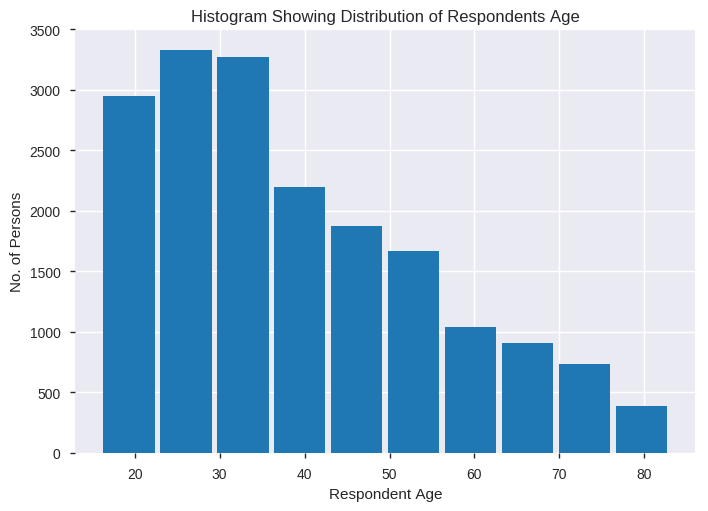

In [541]:
# histogram od the respondent age

plt.hist(fin_t['respondent_age'], bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('Respondent Age')
plt.ylabel('No. of Persons')
plt.title('Histogram Showing Distribution of Respondents Age')
plt.show()


# according to the histogram, most of the respondents were between the ages of 20-40 years.

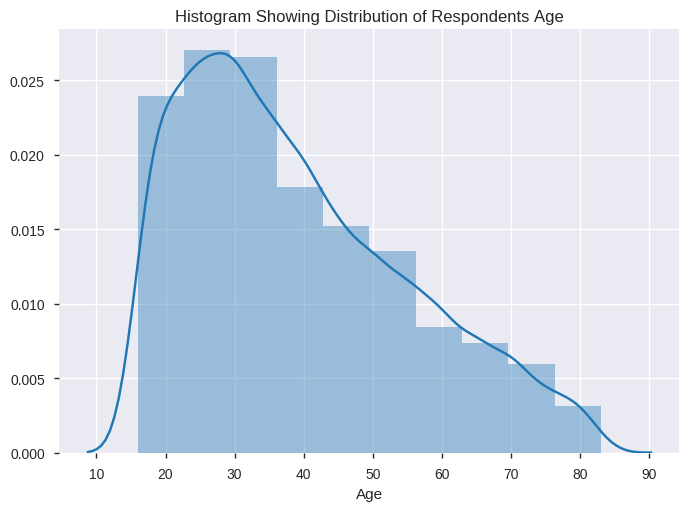

In [542]:
# histogram of respondent age using seaborn

sns.distplot(fin_t['respondent_age'], bins=10, axlabel='Age')
plt.title('Histogram Showing Distribution of Respondents Age')
plt.show()

# the distribution of respondents age is skewed to the right

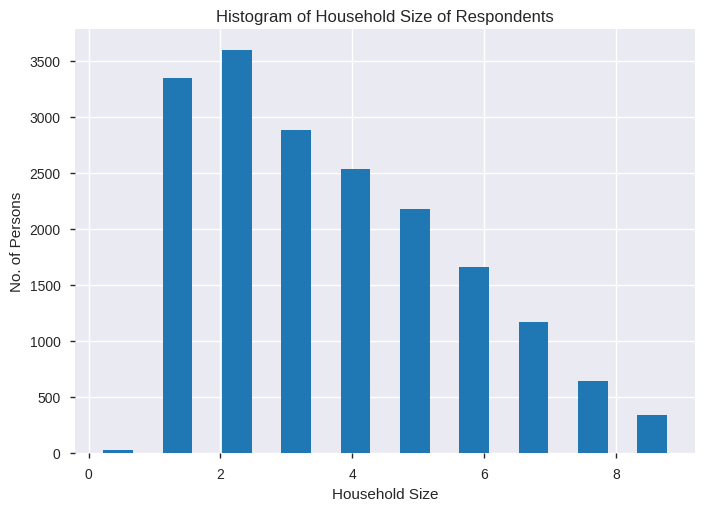

In [579]:
# histogram showing distribution of household size of respondents

plt.hist(fin_t['household_size'], bins=10, histtype='bar', rwidth=0.5)
plt.xlabel('Household Size')
plt.ylabel('No. of Persons')
plt.title('Histogram of Household Size of Respondents')
plt.show()

# most of the respondents had household sizes ranging between 1-5

In [544]:
# comparing value counts of different house sizes with histogram
fin_t['household_size'].value_counts()

2.0    3601
1.0    3349
3.0    2882
4.0    2532
5.0    2176
6.0    1655
7.0    1166
8.0     646
9.0     338
0.0      26
Name: household_size, dtype: int64

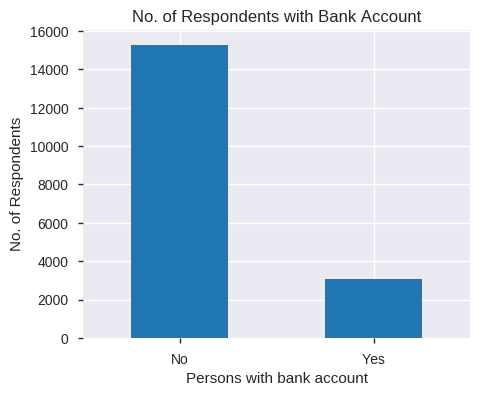

In [545]:
# checking proportion of respondents with bank account

fin_t['has_bank_account'].value_counts().plot.bar(figsize=(5,4))
plt.xticks(rotation=360)
plt.xlabel('Persons with bank account')
plt.ylabel('No. of Respondents')
plt.title('No. of Respondents with Bank Account')
plt.show()

# a great proportion of respondents did not have a bank account

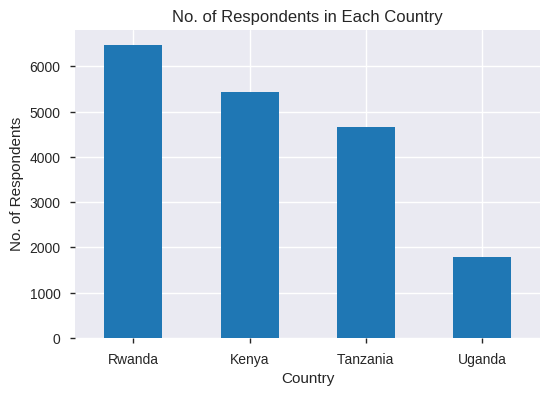

In [546]:
# checking proportion of respondents from each country

fin_t['country'].value_counts().plot.bar(figsize=(6,4))
plt.xticks(rotation=360)
plt.xlabel('Country')
plt.ylabel('No. of Respondents')
plt.title('No. of Respondents in Each Country')
plt.show()

# most of respondents were from Rwanda, followed by Kenya, Tanzania and Uganda respectively

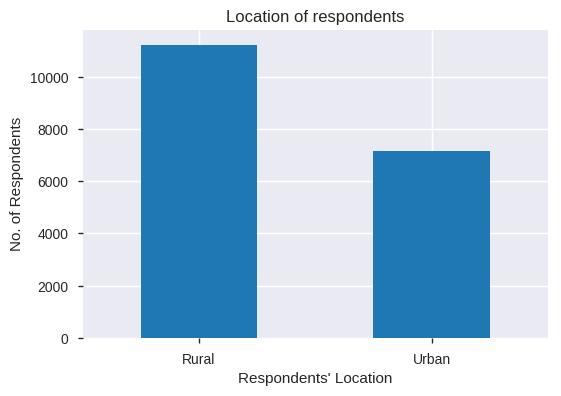

In [547]:
# location (whether urban or rural) of respondents of dataset

fin_t['location'].value_counts().plot.bar(figsize=(6,4))
plt.xticks(rotation=360)
plt.xlabel('Respondents\' Location')
plt.ylabel('No. of Respondents')
plt.title('Location of respondents')
plt.show()

# most of the respondents were located in rural areas

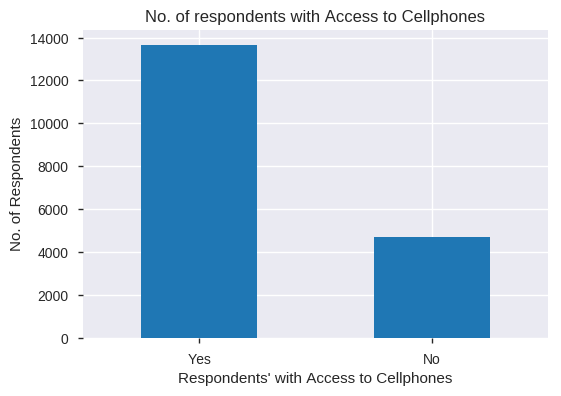

In [548]:
# no of respondents' with cell phone access

fin_t['cellphone_access'].value_counts().plot.bar(figsize=(6, 4))
plt.xticks(rotation=360)
plt.xlabel('Respondents\' with Access to Cellphones')
plt.ylabel('No. of Respondents')
plt.title('No. of respondents with Access to Cellphones')
plt.show()

# most of the respondents had access to cell phones

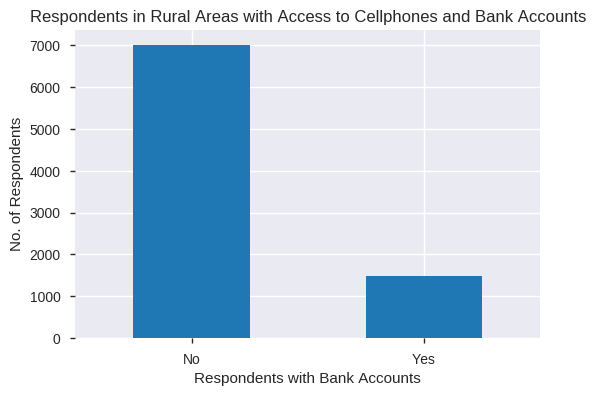

In [549]:
# comparing persons with bank accounts and are located in rural areas and have access to cell phones

fin_sel = fin_t[(fin_t['location'] == 'Rural') & (fin_t['cellphone_access'] == 'Yes')]
fin_sel['has_bank_account'].value_counts().plot.bar(figsize=(6,4))

plt.xticks(rotation=360)
plt.xlabel('Respondents with Bank Accounts')
plt.ylabel('No. of Respondents')
plt.title('Respondents in Rural Areas with Access to Cellphones and Bank Accounts')
plt.show()

# most respondents located in rural areas with access to cell phones did not have a bank account

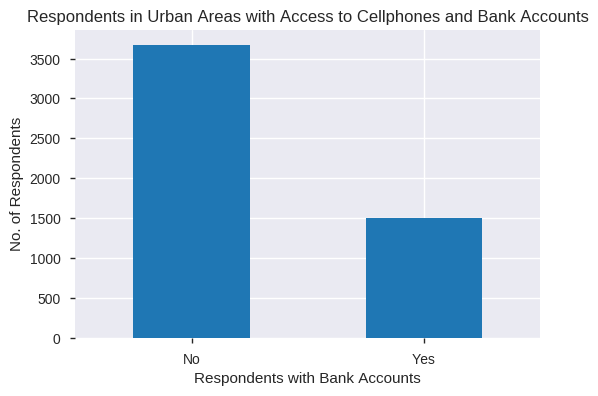

In [550]:
# comparing persons with bank accounts and located in urban areas and have access to cellphones

fin_sl = fin_t[(fin_t['location'] == 'Urban') & (fin_t['cellphone_access'] == 'Yes')]

fin_sl['has_bank_account'].value_counts().plot.bar(figsize=(6,4))

plt.xticks(rotation=360)
plt.xlabel('Respondents with Bank Accounts')
plt.ylabel('No. of Respondents')
plt.title('Respondents in Urban Areas with Access to Cellphones and Bank Accounts')
plt.show()

# most respondents situated in urban areas with access to cell phones lacked a bank account

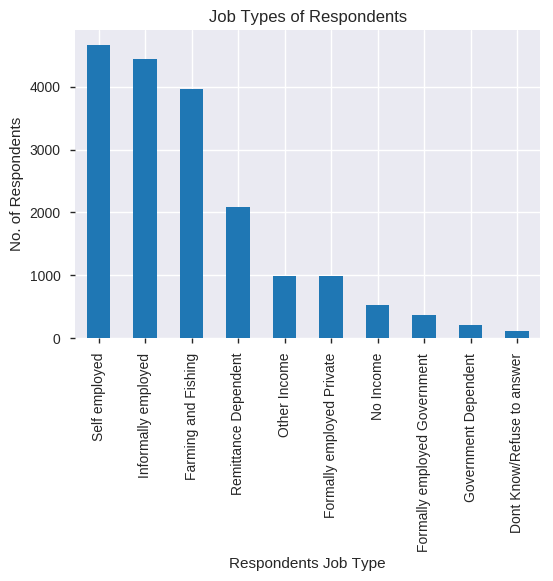

In [551]:
# checking the distribution of job types of respondents

fin_t.job_type.value_counts().plot.bar(figsize=(6,4))

plt.xlabel('Respondents Job Type')
plt.ylabel('No. of Respondents')
plt.title('Job Types of Respondents')
plt.show()

# most of the respondents were self employed, informally employed, 
# or into farming and fishing

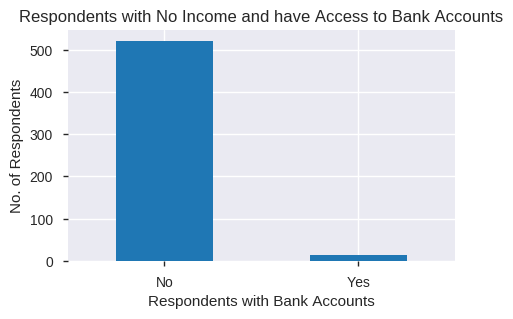

In [552]:
# comparing persons with bank accounts and have their job type is no income

fins = fin_t[fin_t['job_type'] == 'No Income']

fins['has_bank_account'].value_counts().plot.bar(figsize=(5,3))

plt.xticks(rotation=360)
plt.xlabel('Respondents with Bank Accounts')
plt.ylabel('No. of Respondents')
plt.title('Respondents with No Income and have Access to Bank Accounts')
plt.show()

# most respondents with no source of income lacked a bank account

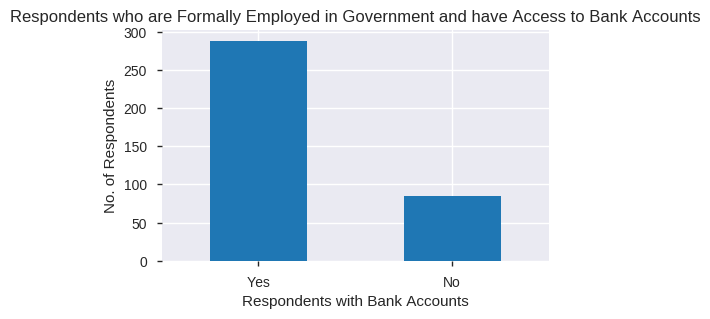

In [553]:
# comparing persons with bank accounts and are formally employed in government

fns = fin_t[fin_t['job_type'] == 'Formally employed Government']

fns['has_bank_account'].value_counts().plot.bar(figsize=(5,3))

plt.xticks(rotation=360)
plt.xlabel('Respondents with Bank Accounts')
plt.ylabel('No. of Respondents')
plt.title('Respondents who are Formally Employed in Government and have Access to Bank Accounts')
plt.show()

# most of the respondents who are formally employed in the government had bank accounts

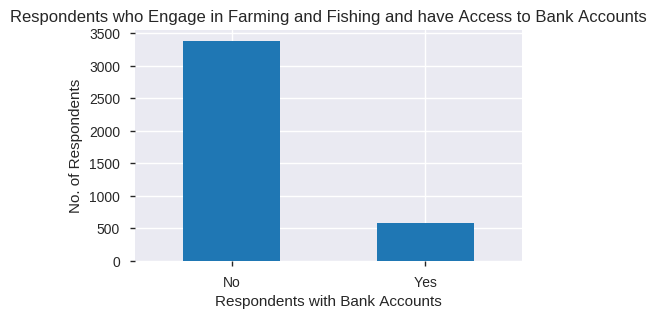

In [554]:
# comparing persons with bank accounts and their job type is farming and fishing

fis = fin_t[fin_t['job_type'] == 'Farming and Fishing']

fis['has_bank_account'].value_counts().plot.bar(figsize=(5,3))

plt.xticks(rotation=360)
plt.xlabel('Respondents with Bank Accounts')
plt.ylabel('No. of Respondents')
plt.title('Respondents who Engage in Farming and Fishing and have Access to Bank Accounts')
plt.show()

# most of the respondents who engae in farming and fishing had no bank accounts

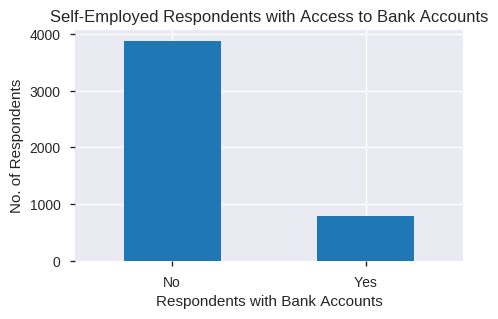

In [555]:
# using a bar graph to compare persons with bank accounts and their job type is farming and fishing

f_self = fin_t[fin_t['job_type'] == 'Self employed']


f_self['has_bank_account'].value_counts().plot.bar(figsize=(5,3))

plt.xticks(rotation=360)
plt.xlabel('Respondents with Bank Accounts')
plt.ylabel('No. of Respondents')
plt.title('Self-Employed Respondents with Access to Bank Accounts')
plt.show()

# most of the respondents who were self-employed had no bank accounts

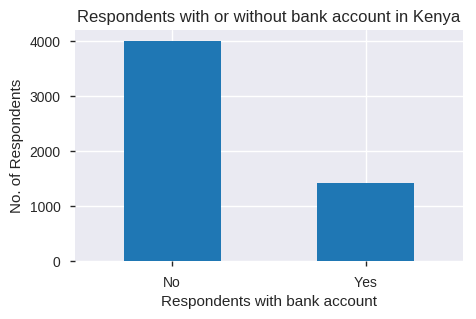

In [556]:
# bar graph displaying respondents in Kenya with/without bank account

ken = fin_t[fin_t['country'] == 'Kenya']
ken['has_bank_account'].value_counts().plot.bar(figsize=(5,3))
plt.xlabel('Respondents with bank account')
plt.xticks(rotation=360)
plt.ylabel('No. of Respondents')
plt.title('Respondents with or without bank account in Kenya')
plt.show()


# about 4000 respondents from Kenya did not have a bank account
# about 1400 respondents from Kenya had a bank account

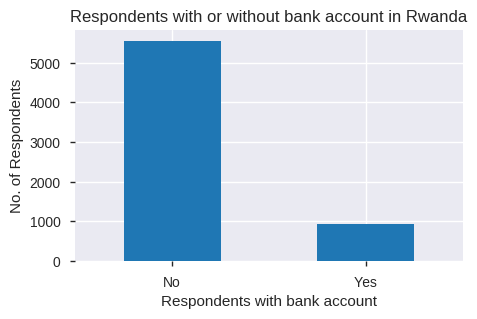

In [557]:
# bar graph displaying proportion of respondents in Rwanda with bank account

rwanda = fin_t[fin_t['country'] == 'Rwanda']
rwanda['has_bank_account'].value_counts().plot.bar(figsize=(5,3))
plt.xlabel('Respondents with bank account')
plt.xticks(rotation=360)
plt.ylabel('No. of Respondents')
plt.title('Respondents with or without bank account in Rwanda')
plt.show()


# approximately 1000 of the respondents from rwanda had bank accounts
# approx. 5500 of the respondents from rwanda lacked bank accounts


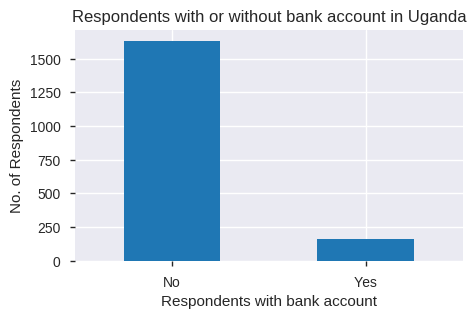

In [558]:
#  respondents in Uganda with bank account

uganda = fin_t[fin_t['country'] == 'Uganda']
uganda['has_bank_account'].value_counts().plot.bar(figsize=(5,3))
plt.xlabel('Respondents with bank account')
plt.xticks(rotation=360)
plt.ylabel('No. of Respondents')
plt.title('Respondents with or without bank account in Uganda')
plt.show()


# about 1600 of the respondents from Uganda lacked banks accounts 
# approx. 150 of the respondents from Uganda had bank accounts

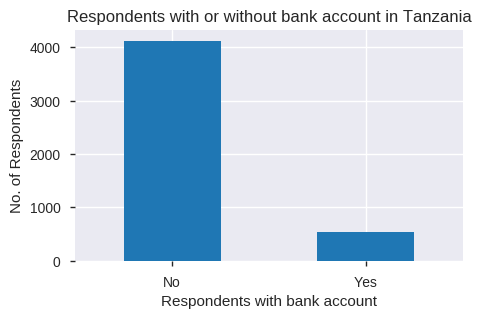

In [559]:
#  respondents in Tanzania with bank account

tan = fin_t[fin_t['country'] == 'Tanzania']
tan['has_bank_account'].value_counts().plot.bar(figsize=(5,3))
plt.xlabel('Respondents with bank account')
plt.xticks(rotation=360)
plt.ylabel('No. of Respondents')
plt.title('Respondents with or without bank account in Tanzania')
plt.show()


# approx 4100 of respondents from tanzania lacked bank accounts
# approx 500 of respondents from Tanzania had bank accounts

### Bivariate Analysis

In [560]:
# checking the descriptive statistics for the numerical variables only

fin_t.describe()

,household_size,respondent_age
count,18371.000000,18371.000000
mean,3.620217,39.011431
std,2.129059,16.286683
min,0.000000,16.000000
25%,2.000000,26.000000
50%,3.000000,35.000000
75%,5.000000,50.000000
max,9.000000,83.000000


#### Correlation

In [561]:
# checking for the correlation between the variables household size and respondent age using corr()
fin_t['household_size'].corr(fin_t['respondent_age'], method='pearson')

# the correlation between the two variables (respondent age & household size) is a negative weak correlation

-0.10818808900924659

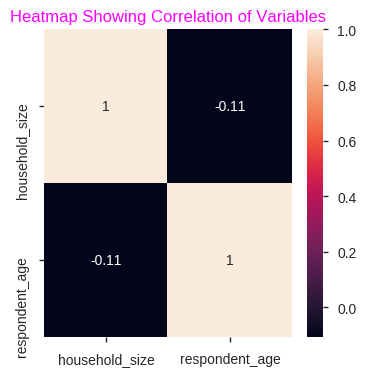

In [562]:
# checking for correlation of variables using seaborn's heatmap

heatmap = fin_t.corr()
plt.figure(figsize=(4,4))
sns.heatmap(heatmap, xticklabels = heatmap.columns, yticklabels=heatmap.columns, annot=True)
plt.title('Heatmap Showing Correlation of Variables', color = "magenta")


plt.show()
# heatmap shows variables have a negative weak correlation

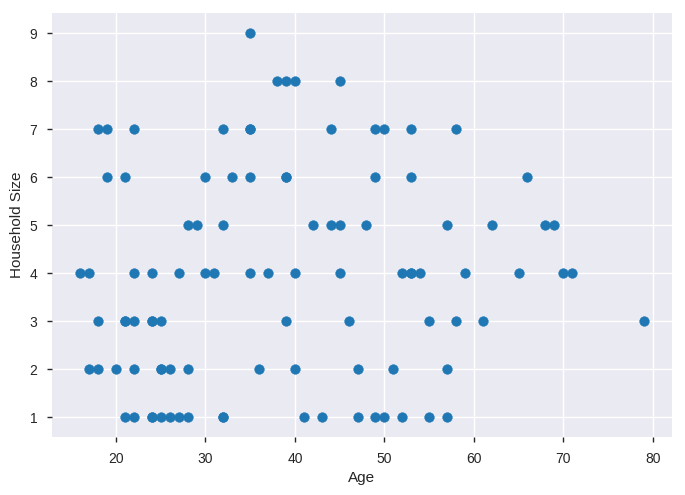

In [563]:
# using a scatter plot to check for correlation between household size and respondent age

fn = fin_t.sample(100)
plt.scatter(fn['respondent_age'], fn['household_size'])
plt.plot(figsize=(4,3))
plt.xlabel('Age')
plt.ylabel('Household Size')
plt.show()

# points are scattered all over, we can conclude that the two variables have no correlation

## Modelling

### Multivariate Analysis and Preprocessing

In [0]:
# creating the features and labels for the model

X = fin_t.drop(['has_bank_account'], 1)
y = fin_t['has_bank_account']

# has bank account column is selected as the target/label (i.e. y) for the model,
# it contains two unique values, 'yes' and 'no'
# the features for the model (i.e. X) are all the columns excluding of the has_bank_account column

In [565]:
# previewing X
X.head()

,country,location,cellphone_access,household_size,respondent_age,gender_of_respondent,rltshp_with_head,marital_status,education_level,job_type
0,Kenya,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [605]:
# converting the categorical columns in the features to numerical variables using get_dummies()

fin_ml = pd.get_dummies(X)
fin_ml.head()

,household_size,respondent_age,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,location_Rural,location_Urban,cellphone_access_No,cellphone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,rltshp_with_head_Child,rltshp_with_head_Head of Household,rltshp_with_head_Other non-relatives,rltshp_with_head_Other relative,rltshp_with_head_Parent,rltshp_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,education_level_6,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,3.0,24.0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,5.0,70.0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,5.0,26.0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,5.0,34.0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,8.0,26.0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [567]:
# checking the datatypes and number of variables 
fin_ml.info()

# resulting dataframe has 40 integer columns and 18371 entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18371 entries, 0 to 23522
Data columns (total 40 columns):
household_size                                     18371 non-null float64
respondent_age                                     18371 non-null float64
country_Kenya                                      18371 non-null uint8
country_Rwanda                                     18371 non-null uint8
country_Tanzania                                   18371 non-null uint8
country_Uganda                                     18371 non-null uint8
location_Rural                                     18371 non-null uint8
location_Urban                                     18371 non-null uint8
cellphone_access_No                                18371 non-null uint8
cellphone_access_Yes                               18371 non-null uint8
gender_of_respondent_Female                        18371 non-null uint8
gender_of_respondent_Male                          18371 non-null uint8
rltshp_with_head_Child 

In [0]:
label_encoder = LabelEncoder()

y_reg = label_encoder.fit_transform(y)

In [0]:
# splitting dataset into training and test sets

X_train, X_test, y_train, y_test = train_test_split(fin_ml, y_reg, test_size=0.2, random_state=100)

#### Fitting Linear Regression Model 

In [608]:
# Creating and training the model by fitting the linear regression model on the training data.
#

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [609]:
predicted_y = reg.predict(X_test)
predicted_y

array([-0.01018038, -0.01460949, -0.05918246, ...,  0.18353316,
        0.28116381,  0.25309116])

In [610]:
r2_score(y_test, predicted_y)

# output indicates that a linear model explains only 24.23% percent of response data variability 
# therefore, it is not a good fit

0.24232613121758328

In [611]:
# Previewing the coefficients and the y intercept of the model

(reg.coef_, reg.intercept_)

(array([-0.00379389,  0.00117843,  0.08004565,  0.04814028, -0.04182969,
        -0.08635624, -0.02374718,  0.02374718, -0.04505656,  0.04505656,
        -0.023203  ,  0.023203  , -0.02178117,  0.0580663 , -0.04685551,
        -0.02392598, -0.01201427,  0.04651064, -0.03365311,  0.07103158,
         0.00557512, -0.02331055, -0.01964304, -0.08283202, -0.25924697,
         0.36928159, -0.19699206, -0.09287016,  0.13904302,  0.12361659,
        -0.0352271 , -0.08928804,  0.26525359,  0.17810815,  0.01054699,
        -0.11597519, -0.06856887,  0.00438765, -0.12147787, -0.02775929]),
 0.28247732101525574)

In [612]:
X2 = sm.add_constant(fin_ml.values)
model = sm.OLS(y_reg, X2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     199.4
Date:                Sun, 18 Aug 2019   Prob (F-statistic):               0.00
Time:                        20:51:51   Log-Likelihood:                -5210.7
No. Observations:               18371   AIC:                         1.049e+04
Df Residuals:                   18338   BIC:                         1.075e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0785      0.010      8.007      0.0

#### Normalization

In [0]:
# applying normalization on the features using standard scaler normalization
# normalization ensures no single variable exhibits much greater variance than the other

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Dimensionality Reduction Using PCA

In [0]:
# dimesionality reduction by applying pca on the features 

pca = PCA()

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [571]:
# checking the explained variance ratio

explained_variance = pca.explained_variance_ratio_
explained_variance

array([9.05432056e-02, 7.15052743e-02, 7.05091134e-02, 5.50408952e-02,
       4.90606624e-02, 4.37806675e-02, 4.05781843e-02, 3.59453377e-02,
       3.52769460e-02, 3.31330596e-02, 3.13589760e-02, 2.85690609e-02,
       2.74604722e-02, 2.60739924e-02, 2.59522529e-02, 2.54808143e-02,
       2.53304597e-02, 2.49922660e-02, 2.47511480e-02, 2.47263803e-02,
       2.43999352e-02, 2.39666849e-02, 2.30204226e-02, 2.20236732e-02,
       2.07719169e-02, 2.03124942e-02, 1.60159510e-02, 1.48221575e-02,
       1.21630177e-02, 1.21347842e-02, 1.06613394e-02, 9.63845431e-03,
       3.18326806e-32, 4.49110887e-33, 2.83039104e-33, 2.69796918e-33,
       2.37408530e-33, 8.75643892e-34, 7.21199715e-34, 3.69559901e-34])

In [0]:
# checking results with 32 principal components 

pca = PCA(n_components=15)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

### Creating A Model using RandomForest Classifier

In [573]:
# training and making predictions using RandomForestClassifier as the ML model

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# predicting the label

pred_y = classifier.predict(X_test)
pred_y

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

#### Performance Evaluation of Model

In [574]:
# performance evaluation of model 

cmatrix = confusion_matrix(y_test, pred_y)
print(cmatrix)
print('Accuracy is: {}' .format(accuracy_score(y_test, pred_y)))
print('\nPercentage Accuracy with PCA is: {}%' .format(accuracy_score(y_test, pred_y) * 100))

# the output indicates that with 31 principal components, 
# the randomforest classifier predicted persons likely to own a bank account with 86.489% accuracy while using pca for dimensionality reduction

[[3041    8]
 [ 566   60]]
Accuracy is: 0.8438095238095238

Percentage Accuracy with PCA is: 84.38095238095238%


### Dimensionality Reduction using LDA

In [582]:

lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [583]:
# Training and Making Predictions
# We will use the random forest classifier to evaluate the performance of a LDA-reduced algorithm as shown
# 

rf_classifier = RandomForestClassifier(max_depth=2, random_state=10)
rf_classifier.fit(X_train, y_train)

# predicting
y_pred = rf_classifier.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [584]:
conMat = confusion_matrix(y_test, y_pred)
print(conMat)
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))
print('Percentage Accuracy with PCA is: {}%' .format(accuracy_score(y_test, y_pred) * 100))

# lda exhibits slightly improved accuracy than pca


[[3002   47]
 [ 486  140]]
Accuracy: 0.8549659863945578
Percentage Accuracy with PCA is: 85.49659863945578%
